# <font color="red"> MBA em IA e Big Data</font>
## <span style="color:red">Redes Neurais e Deep Learning</span>
## **Exemplo de Uso de LSTM**

### **REDES NEURAIS RECORRENTES**
 

### Profa. Roseli Ap. Francelin Romero

**PROBLEMA**: SERIE TEMPORAL - Previsão de passageiros de uma Cia Aérea Internacional.

Este é um problema em que, dados um ano e um mês, a tarefa é prever o número de passageiros (em unidades de 1.000) de companhias aéreas internacionais. Os dados variam de janeiro de 1949 a dezembro de 1960,  12 anos, com 144 observações.





Por default o Keras mantem um estado com um batch (stateful=True). Um batch é um no. de linhas do conjunto de dados usado para o treinamento. Entre uma camada e outra na LTSM o estado é desconsiderado (limpado) por default. Isto nos dá um controle mais fino entre os estados e podemos usar a função resetstates(). <\br>

**LSTM PARA REGRESSÃO** A cam. LSTM espera uma matriz como entrada: [samples, time steps, features], onde?

**Samples**: são as observações do dominio da aplicação, normalmente as linhas do dataset.</br> 
**Time steps**: são passos de tempo de separação de uma dada variavel para uma dada observação.</br>
**Features**: são medidas separadas observadas em cada tempo da observação.

Nesta série, os seguintes passos serão considerados:

- Carregar o dataset do CSV file.
- Transformar o dataset de modo a adequa-lo para o modelo LSTM, incluindo: 
- 1 - Transformar os dados para um problema de aprendizado supervisionado. 
- 2 - Transformar os dados para ser "stationary". 
- 3 - Transformar os dados para que fiquem no interv. [-1,1]. 
- 4 - Ajusta o modelo da rede LSTM para o conj. de treinamento. 
- 5 - Avaliar o modelo LSTM estático no conjunto de teste. 
- 6 - Visualizar o desempenho da Previsão. 

In [1]:

# LSTM for international airline passengers problem with regression framing
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# converte um array de valores numa matriz de dados 
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)
 
# as sementes ajudam a ter resultados reproduzíveis
from numpy.random import seed
seed(1)
from tensorflow.random import set_seed
set_seed(2)

# Carregar o dataset
dataframe = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')


In [2]:
# normalizar o dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [3]:
# dividir em conjuntos de train and test 
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [4]:
# reshape em X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

print('X(t)', 'Y(t+1)')
for i in range(len(trainX)):
  print(trainX[i], trainY[i])
 

X(t) Y(t+1)
[0.01544401] 0.027027026
[0.02702703] 0.05405405
[0.05405405] 0.04826255
[0.04826255] 0.032818526
[0.03281853] 0.059845567
[0.05984557] 0.08494207
[0.08494207] 0.08494207
[0.08494207] 0.06177607
[0.06177607] 0.02895753
[0.02895753] 0.0
[0.] 0.027027026
[0.02702703] 0.021235526
[0.02123553] 0.042471036
[0.04247104] 0.07142857
[0.07142857] 0.059845567
[0.05984557] 0.040540546
[0.04054055] 0.08687258
[0.08687258] 0.12741312
[0.12741312] 0.12741312
[0.12741312] 0.10424709
[0.10424709] 0.055984557
[0.05598456] 0.01930502
[0.01930502] 0.06949806
[0.06949806] 0.07915059
[0.07915059] 0.08880308
[0.08880308] 0.14285713
[0.14285713] 0.11389962
[0.11389962] 0.13127413
[0.13127413] 0.14285713
[0.14285713] 0.18339768
[0.18339768] 0.18339768
[0.18339768] 0.15444016
[0.15444016] 0.11196911
[0.11196911] 0.08108109
[0.08108109] 0.1196911
[0.1196911] 0.12934363
[0.12934363] 0.14671814
[0.14671814] 0.17181468
[0.17181468] 0.14864865
[0.14864865] 0.15250966
[0.15250966] 0.22007722
[0.22007722]

In [5]:
# reshape entrada na forma [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [6]:
# criando and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
model.summary()

2022-11-07 18:22:48.428273: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-11-07 18:22:48.864654: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
94/94 - 2s - loss: 0.0635
Epoch 2/100
94/94 - 0s - loss: 0.0357
Epoch 3/100
94/94 - 0s - loss: 0.0259
Epoch 4/100
94/94 - 0s - loss: 0.0223
Epoch 5/100
94/94 - 0s - loss: 0.0206
Epoch 6/100
94/94 - 0s - loss: 0.0194
Epoch 7/100
94/94 - 0s - loss: 0.0185
Epoch 8/100
94/94 - 0s - loss: 0.0172
Epoch 9/100
94/94 - 0s - loss: 0.0160
Epoch 10/100
94/94 - 0s - loss: 0.0149
Epoch 11/100
94/94 - 0s - loss: 0.0137
Epoch 12/100
94/94 - 0s - loss: 0.0124
Epoch 13/100
94/94 - 0s - loss: 0.0111
Epoch 14/100
94/94 - 0s - loss: 0.0099
Epoch 15/100
94/94 - 0s - loss: 0.0087
Epoch 16/100
94/94 - 0s - loss: 0.0075
Epoch 17/100
94/94 - 0s - loss: 0.0065
Epoch 18/100
94/94 - 0s - loss: 0.0055
Epoch 19/100
94/94 - 0s - loss: 0.0047
Epoch 20/100
94/94 - 0s - loss: 0.0040
Epoch 21/100
94/94 - 0s - loss: 0.0034
Epoch 22/100
94/94 - 0s - loss: 0.0030
Epoch 23/100
94/94 - 0s - loss: 0.0027
Epoch 24/100
94/94 - 0s - loss: 0.0025
Epoch 25/100
94/94 - 0s - loss: 0.0023
Epoch 26/100
94/94 - 0s - loss: 0.

In [7]:
# fazer as predicoes
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [8]:
# inverter antes as predicoes
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calcular o RMSE error root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 23.25 RMSE
Test Score: 52.84 RMSE


In [9]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

Vamos plotar o dataset original em azul, as predicoes para o conj. de treinamento em verde, e as predicoes dos dados de test em vermelho.

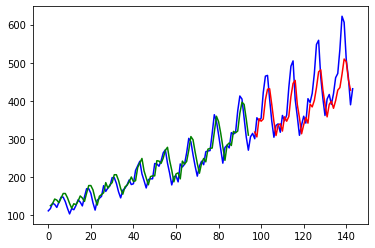

In [10]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset), color="blue")
plt.plot(trainPredictPlot, color="green")
plt.plot(testPredictPlot, color="red")
plt.show()

Podemos ver que o modelo tem um erro médio de cerca de 23 passageiros (em milhares) no conjunto de dados de treinamento e cerca de 50 passageiros (em milhares) no conjunto de dados de teste. Não tão ruim.

####**LSTM for Regression Using the Window Method**

Também podemos formular o problema de forma que várias timesteps recentes possam ser usadas para fazer a previsão para o próximo timestep.

Isso é chamado de **janela**, e o tamanho da janela é um parâmetro que pode ser ajustado para cada problema.

Por exemplo, dado o tempo atual (t) que queremos prever o valor no próximo tempo na sequência (t + 1), podemos usar o tempo atual (t), bem como os dois tempos anteriores (t-1 e t-2) como variáveis ​​de entrada.

Quando formulado como um problema de regressão, as variáveis ​​de entrada são t-2, t-1, t e a variável de saída é t + 1.

A função **create_dataset()** criada nos permite allows criar esta formulação aumentando a var. **look_back** de 1 para 3.

Exemplo:</br>
X1	X2	X3	Y </br>
112	118	132	129 </br>
118	132	129	121 </br>
132	129	121	135 </br>
129	121	135	148 </br>
121	135	148	148 </br>

In [11]:
# reshape em X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
new_data=pd.DataFrame()
 

Epoch 1/100
92/92 - 2s - loss: 0.0470
Epoch 2/100
92/92 - 0s - loss: 0.0172
Epoch 3/100
92/92 - 0s - loss: 0.0125
Epoch 4/100
92/92 - 0s - loss: 0.0108
Epoch 5/100
92/92 - 0s - loss: 0.0095
Epoch 6/100
92/92 - 0s - loss: 0.0082
Epoch 7/100
92/92 - 0s - loss: 0.0071
Epoch 8/100
92/92 - 0s - loss: 0.0062
Epoch 9/100
92/92 - 0s - loss: 0.0055
Epoch 10/100
92/92 - 0s - loss: 0.0049
Epoch 11/100
92/92 - 0s - loss: 0.0045
Epoch 12/100
92/92 - 0s - loss: 0.0043
Epoch 13/100
92/92 - 0s - loss: 0.0040
Epoch 14/100
92/92 - 0s - loss: 0.0039
Epoch 15/100
92/92 - 0s - loss: 0.0038
Epoch 16/100
92/92 - 0s - loss: 0.0037
Epoch 17/100
92/92 - 0s - loss: 0.0037
Epoch 18/100
92/92 - 0s - loss: 0.0037
Epoch 19/100
92/92 - 0s - loss: 0.0037
Epoch 20/100
92/92 - 0s - loss: 0.0035
Epoch 21/100
92/92 - 0s - loss: 0.0036
Epoch 22/100
92/92 - 0s - loss: 0.0035
Epoch 23/100
92/92 - 0s - loss: 0.0035
Epoch 24/100
92/92 - 0s - loss: 0.0034
Epoch 25/100
92/92 - 0s - loss: 0.0034
Epoch 26/100
92/92 - 0s - loss: 0.

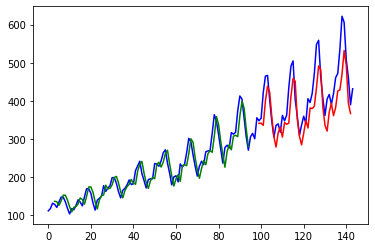

In [12]:
# reshape as entradas na forma [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# cria e aplica a rede LSTM 
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# fazer as predicoes
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# inverter as predicoes
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calcular o RMSE - root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift prediçoes de treinamento para fazer o plot
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift prediçoes de teste para fazer o plot
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot original and predicoes
plt.plot(scaler.inverse_transform(dataset), color = "blue")
plt.plot(trainPredictPlot, color="green")
plt.plot(testPredictPlot, color="red")
plt.show()

Podemos ver que o erro no conjunto de teste aumentou ligeiramente em relação ao da seção anterior. O tamanho da janela e a arquitetura da rede não foram ajustados: esta é apenas uma demonstração de como enjanelar um problema de previsão.

**LSTM com Memory entre os  Batches** </br>

Normalmente, o estado dentro da rede é redefinido após cada batch (lote) de treinamento ao ajustar o modelo, 
bem como cada chamada para model.predict () ou
 model.evaluate (). </br>

Podemos obter um controle mais preciso sobre quando o estado interno da rede LSTM é desconsiderado, 
tornando a camada LSTM “com estado”. </br>
Isso significa que ele pode criar um estado ao longo de toda a sequência de treinamento e 
até mesmo manter esse estado, se necessário, para fazer previsões. </br>
**Por exemplo:**
for i in range(100): </br>
> model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False) </br>
>	model.reset_states() </br>

92/92 - 2s - loss: 0.0045
92/92 - 0s - loss: 0.0049
92/92 - 0s - loss: 0.0048
92/92 - 0s - loss: 0.0047
92/92 - 0s - loss: 0.0047
92/92 - 0s - loss: 0.0046
92/92 - 0s - loss: 0.0046
92/92 - 0s - loss: 0.0045
92/92 - 0s - loss: 0.0045
92/92 - 0s - loss: 0.0045
92/92 - 0s - loss: 0.0044
92/92 - 0s - loss: 0.0044
92/92 - 0s - loss: 0.0044
92/92 - 0s - loss: 0.0043
92/92 - 0s - loss: 0.0043
92/92 - 0s - loss: 0.0043
92/92 - 0s - loss: 0.0042
92/92 - 0s - loss: 0.0042
92/92 - 0s - loss: 0.0042
92/92 - 0s - loss: 0.0042
92/92 - 0s - loss: 0.0041
92/92 - 0s - loss: 0.0041
92/92 - 0s - loss: 0.0041
92/92 - 0s - loss: 0.0041
92/92 - 0s - loss: 0.0040
92/92 - 0s - loss: 0.0040
92/92 - 0s - loss: 0.0040
92/92 - 0s - loss: 0.0040
92/92 - 0s - loss: 0.0039
92/92 - 0s - loss: 0.0039
92/92 - 0s - loss: 0.0039
92/92 - 0s - loss: 0.0039
92/92 - 0s - loss: 0.0038
92/92 - 0s - loss: 0.0038
92/92 - 0s - loss: 0.0038
92/92 - 0s - loss: 0.0038
92/92 - 0s - loss: 0.0037
92/92 - 0s - loss: 0.0037
92/92 - 0s -

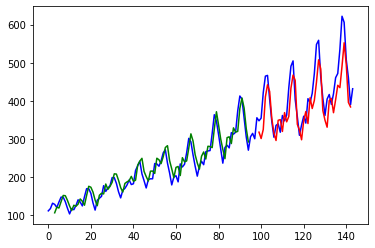

In [13]:
## LSTM para o problema para passageiros em Cia Aerea Intern. com Memoria
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

 
# separar em conjuntos de train and test 
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape em X=t and Y=t+1 agora com 3 timesteps anteriores
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape entrada na forma [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# criar e aplicar a rede LSTM 
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(100):
	model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
	model.reset_states()
# fazer as predicoes
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
# inverter as predicoes
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calcular o RMSE - root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift predicoes de treinamento para plotar
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift predicoes de teste para plotar
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot original e predicoes
plt.plot(scaler.inverse_transform(dataset), color="blue")
plt.plot(trainPredictPlot, color="green")
plt.plot(testPredictPlot, color="red")
plt.show()